In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [12]:
df_18 = pd.read_csv('Caravacahorarias2018.csv', header=1)
df_18= df_18.drop(['PRB (mb)'],axis =1)
df_18.rename(columns = {'Fecha':'Date'}, inplace = True) 
df_19 = pd.read_csv('Caravacahorarias2019.csv', header=1)
df_19= df_19.drop(['PRB (mb)','C6H6 (µg/m³N)','C7H8 (µg/m³N)','XIL (µg/m³N)'],axis =1)
df_19.rename(columns = {'Fecha':'Date'}, inplace = True)
aljorra = pd.concat([df_18,df_19])
d = pd.date_range(start ='1-1-2018', end ='1-1-2020', freq ='H')
aljorra['Date'] = d[:-1]
aljorra['Month'] = d[:-1].strftime("%m")
aljorra['Hour'] = d[:-1].strftime("%H")
aljorra.to_csv('aljorra.csv',index=False)
aljorra =  aljorra.reset_index()
aljorra = aljorra.drop('index',1)
alc = aljorra.drop(columns=['Date','Month','Hour'])
normalized_al=(alc-alc.min())/(alc.max()-alc.min())
normalized_al['Date'] = d[:-1]
normalized_al['Date'] = pd.to_datetime(normalized_al['Date'], format='%d-%m-%Y')
normalized_al['Month'] = d[:-1].strftime("%m")
normalized_al['Hour'] = d[:-1].strftime("%H")
normalized_al = normalized_al.set_index('Date')
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) 
After_imputation = imputer.fit_transform(normalized_al)
alc_knn = pd.DataFrame(After_imputation, columns = ['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','NOX (µg/m³N)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'])
denormalized_alc=(alc_knn*(alc.max()-alc.min()))+alc.min()
denormalized_alc['Date'] = d[:-1]
denormalized_alc['Date'] = pd.to_datetime(denormalized_alc['Date'], format='%d-%m-%Y')
in_array = np.linspace(0, np.pi, 17520)
out_array = np.sin(in_array)
denormalized_alc['Month'] = 12*out_array
denormalized_alc['Hour'] = d[:-1].strftime("%H")
from pandas import DataFrame
from pandas import concat
temps = denormalized_alc
shifted = temps.shift(1)
window = shifted.rolling(window=12)
means = window.mean()
window1 = shifted.rolling(window=24)
means1 = window.mean()
denormalized_alc['NO_roll_mean'] = means['NO (µg/m³N)']
denormalized_alc['NO2_roll_mean'] = means['NO2 (µg/m³N)']
denormalized_alc['NOX_roll_mean'] = means['NOX (µg/m³N)']
denormalized_alc['PM10_roll_mean'] = means['PM10 (µg/m³N)']
denormalized_alc['O3_roll_mean'] = means1['O3 (µg/m³N)']
temps = denormalized_alc
shifted1 = temps.shift(1)
shifted2 = temps.shift(2)
denormalized_alc['NO_lag1'] = shifted1['NO (µg/m³N)']
denormalized_alc['NO2_lag1'] = shifted1['NO2 (µg/m³N)']
denormalized_alc['NOX_lag1'] = shifted1['NOX (µg/m³N)']
denormalized_alc['PM10_lag1'] = shifted1['PM10 (µg/m³N)']
denormalized_alc['O3_lag1'] = shifted1['O3 (µg/m³N)']
denormalized_alc['NO_lag2'] = shifted2['NO (µg/m³N)']
denormalized_alc['NO2_lag2'] = shifted2['NO2 (µg/m³N)']
denormalized_alc['NOX_lag2'] = shifted2['NOX (µg/m³N)']
denormalized_alc['PM10_lag2'] = shifted2['PM10 (µg/m³N)']
denormalized_alc['O3_lag2'] = shifted2['O3 (µg/m³N)']
denormalized_alc = denormalized_alc.dropna()
#denormalized_alc.to_csv('c.csv',index=False)
denormalized_alc

ValueError: Shape of passed values is (17520, 12), indices imply (17520, 13)

In [18]:
df = pd.read_csv('al.csv')

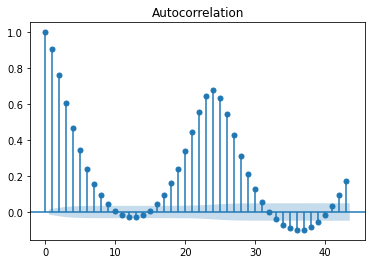

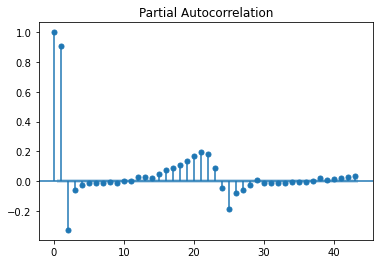

In [21]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
series = df['O3 (µg/m³N)']
plot_acf(series)
plot_pacf(series)
pyplot.show()